In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#Base pessoa-item

In [2]:
pes_item = pd.read_csv('Bases/pessoa-item.csv')

C:\Users\celso\AppData\Local\Temp\ipykernel_21036\1887398859.py:1: DtypeWarning: Columns (0,2,6,9,14,16,19,21,22,24,25,28,30,31,33,34,37,38,39,40,41,43,44,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  pes_item = pd.read_csv('Bases/pessoa-item.csv')


In [3]:
pes_item

,CD_ORGAO,TP_DOCUMENTO,NR_DOCUMENTO,TP_PESSOA,NM_PESSOA,DS_OBJETO_SOCIAL,NR_INSCRICAO_ESTADUAL,NR_INSCRICAO_MUNICIPAL,CD_TIPO_CONSELHO_PROFISSIONAL,NR_CONSELHO_PROFISSIONAL,...,VL_TOTAL_HOMOLOGADO,PC_BDI_HOMOLOGADO,PC_ENCARGOS_SOCIAIS_HOMOLOGADO,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COVID19
0,51200,J,95131033000187,J,Elisangela Pereira da Silva - Epp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,46401,J,18605962000130,J,CLASSUL INDÚSTRIA E COMÉRCIO DE PLACAS E BRIND...,NaN,NaN,3021023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,N
2,45000,J,7752236000123,J,MEDILAR IMP DISTRIB DE PROD MED. HOSP LTDA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,88300,J,11318264000104,J,WEL DISTRIB. MED. E PROD. P/ SAUDE LTDA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,63300,J,7629753000100,J,Nova Compular Informatica Ltda - Me,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785810,88041,J,16721444000156,J,TELSEG SERVICOS E COMERCIO DE EQUIPAMENT,NaN,390161764.0,NaN,NaN,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,N
785811,61000,J,13210928000142,J,Servpref Servicos de Logistica para Saude Ltda...,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N
785812,44300,J,11594940000172,J,Taquara Inspecoes Veiculares Ltda,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,N
785813,53700,J,72199508000171,J,Stamm Comercio de Pneus Ltda - Epp,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
print(pes_item.columns.tolist())

['CD_ORGAO', 'TP_DOCUMENTO', 'NR_DOCUMENTO', 'TP_PESSOA', 'NM_PESSOA', 'DS_OBJETO_SOCIAL', 'NR_INSCRICAO_ESTADUAL', 'NR_INSCRICAO_MUNICIPAL', 'CD_TIPO_CONSELHO_PROFISSIONAL', 'NR_CONSELHO_PROFISSIONAL', 'SG_UF_CONSELHO_PROFISSIONAL', 'DS_EMAIL', 'DS_PAGINA_INTERNET', 'SG_UF', 'CD_MUNICIPIO_IBGE', 'LOGRADOURO', 'NR_ENDERECO', 'COMPLEMENTO', 'BAIRRO', 'CEP', 'TELEFONE', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS', 'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_ESTIMADO', 'VL_TOTAL_ESTIMADO', 'DT_REF_VALOR_ESTIMADO', 'PC_BDI_ESTIMADO', 'PC_ENCARGOS_SOCIAIS_ESTIMADO', 'CD_FONTE_REFERENCIA', 'DS_FONTE_REFERENCIA', 'TP_RESULTADO_ITEM', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'PC_BDI_HOMOLOGADO', 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO', 'TP_ORCAMENTO', 'CD_TIPO_FAMILIA', 'CD_TIPO_SUBFAMILIA', 'TP_BENEFICIO_MICRO_EPP', 'PC_TX_ESTIMADA', 'PC_TX_HOMOLOGADA', 'BL_COVID19']


In [5]:
# Criar coluna id_pessoa com base no documento
pes_item['id_pessoa'] = pes_item['NR_DOCUMENTO'].astype(str).str.strip()

# Verificar quantos documentos são duplicados
duplicados = pes_item['id_pessoa'].duplicated().sum()
print(f"{duplicados} pessoas aparecem mais de uma vez na base.")


741306 pessoas aparecem mais de uma vez na base.


In [6]:
# Colunas relacionadas à identificação da pessoa
colunas_pessoa = [
    'id_pessoa', 'TP_PESSOA', 'NM_PESSOA', 'DS_OBJETO_SOCIAL',
    'SG_UF', 'CD_MUNICIPIO_IBGE', 'NR_INSCRICAO_ESTADUAL',
    'NR_INSCRICAO_MUNICIPAL', 'TP_DOCUMENTO', 'NR_DOCUMENTO'
]

# Criação da base de pessoas (remover duplicatas por id_pessoa)
df_pessoas_item = pes_item[colunas_pessoa].drop_duplicates(subset='id_pessoa').copy()
print(f"df_pessoas_item tem {df_pessoas_item.shape[0]} pessoas únicas.")

# Demais colunas são da base de participações
colunas_item = list(set(pes_item.columns) - set(colunas_pessoa))
df_itens = pes_item[colunas_item].copy()
print(f"df_itens tem {df_itens.shape[0]} linhas e {df_itens.shape[1]} colunas.")

df_pessoas_item tem 44509 pessoas únicas.
df_itens tem 785815 linhas e 40 colunas.


In [7]:
df_pessoas_item.isna().sum().sort_values(ascending=False)

DS_OBJETO_SOCIAL          43186
NR_INSCRICAO_ESTADUAL     38320
NR_INSCRICAO_MUNICIPAL    37070
CD_MUNICIPIO_IBGE          4316
SG_UF                      4314
NM_PESSOA                  4312
id_pessoa                     0
TP_PESSOA                     0
TP_DOCUMENTO                  0
NR_DOCUMENTO                  0
dtype: int64

In [8]:
colunas_remover = ['DS_OBJETO_SOCIAL', 'NR_INSCRICAO_ESTADUAL', 'NR_INSCRICAO_MUNICIPAL']
df_pessoas_item = df_pessoas_item.drop(columns=colunas_remover)

In [9]:
df_pessoas_item

,id_pessoa,TP_PESSOA,NM_PESSOA,SG_UF,CD_MUNICIPIO_IBGE,TP_DOCUMENTO,NR_DOCUMENTO
0,95131033000187,J,Elisangela Pereira da Silva - Epp,RS,4311304.0,J,95131033000187
1,18605962000130,J,CLASSUL INDÚSTRIA E COMÉRCIO DE PLACAS E BRIND...,RS,4314902.0,J,18605962000130
2,7752236000123,J,MEDILAR IMP DISTRIB DE PROD MED. HOSP LTDA,RS,4322707.0,J,7752236000123
3,11318264000104,J,WEL DISTRIB. MED. E PROD. P/ SAUDE LTDA,RS,4311403.0,J,11318264000104
4,7629753000100,J,Nova Compular Informatica Ltda - Me,RS,4321451.0,J,7629753000100
...,...,...,...,...,...,...,...
785331,55588764000131,J,SERRALHERIA ACO SUL SERVICOS LTDA,RS,4305108.0,J,55588764000131
785332,57359764000195,J,TRILHA DO SABER ESCOLA DE EDUCACAO INFANTIL LTDA,RS,4305108.0,J,57359764000195
785446,6193788000186,J,VALENTIN TAPIA BORELLA,RS,4313706.0,J,6193788000186
785502,88212113025277,J,COMERCIO DE MEDICAMENTOS BRAIR LTDA - Barão do...,RS,4311205.0,J,88212113025277


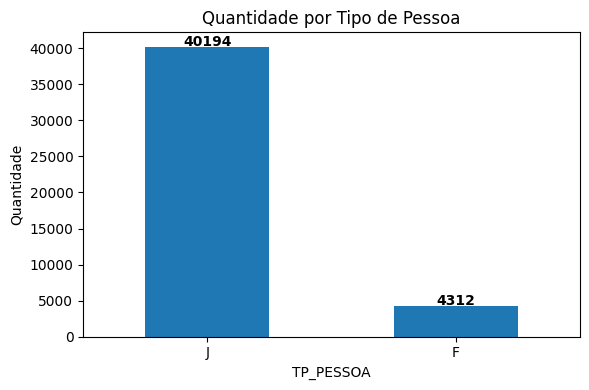

In [10]:
contagem_tp = df_pessoas_item['TP_PESSOA'].value_counts().head(2)
ax = contagem_tp.plot(kind='bar', figsize=(6, 4), title='Quantidade por Tipo de Pessoa')
plt.xlabel('TP_PESSOA')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Adiciona valores acima das barras
for i, v in enumerate(contagem_tp):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

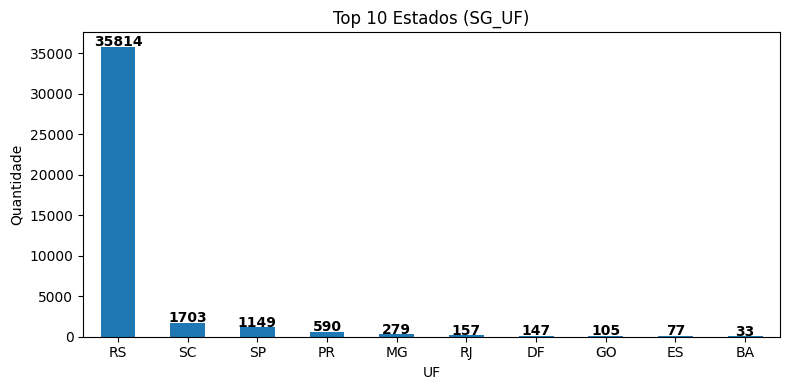

In [11]:
contagem_uf = df_pessoas_item['SG_UF'].value_counts().head(10)
ax = contagem_uf.plot(kind='bar', figsize=(8, 4), title='Top 10 Estados (SG_UF)')
plt.xlabel('UF')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

for i, v in enumerate(contagem_uf):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


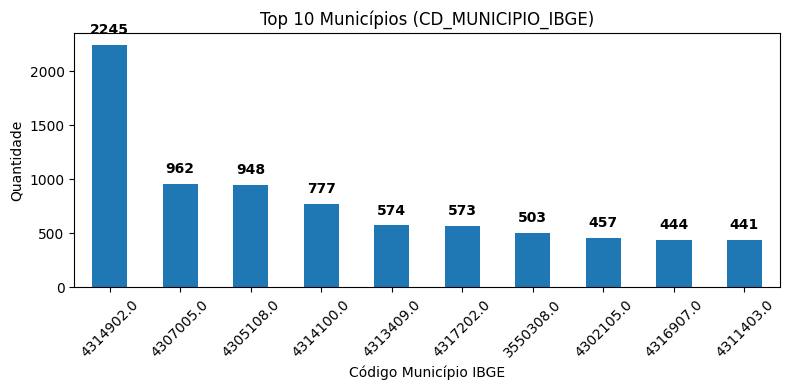

In [12]:
contagem_mun = df_pessoas_item['CD_MUNICIPIO_IBGE'].value_counts().head(10)
ax = contagem_mun.plot(kind='bar', figsize=(8, 4), title='Top 10 Municípios (CD_MUNICIPIO_IBGE)')
plt.xlabel('Código Município IBGE')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

for i, v in enumerate(contagem_mun):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [13]:
df_itens.shape

(785815, 40)

In [14]:
df_itens.isna().sum().sort_values(ascending=False)

PC_TX_HOMOLOGADA                  785795
PC_TX_ESTIMADA                    785783
SG_UF_CONSELHO_PROFISSIONAL       784804
CD_TIPO_CONSELHO_PROFISSIONAL     784794
NR_CONSELHO_PROFISSIONAL          784793
CD_TIPO_SUBFAMILIA                778913
CD_TIPO_FAMILIA                   778011
DS_PAGINA_INTERNET                777928
TP_RESULTADO_ITEM                 774926
TP_ORCAMENTO                      734025
CD_FONTE_REFERENCIA               651178
DS_FONTE_REFERENCIA               641607
PC_BDI_ESTIMADO                   638239
PC_ENCARGOS_SOCIAIS_ESTIMADO      637430
PC_ENCARGOS_SOCIAIS_HOMOLOGADO    631449
TP_BENEFICIO_MICRO_EPP            624948
PC_BDI_HOMOLOGADO                 624303
VL_TOTAL_HOMOLOGADO               591332
VL_UNITARIO_HOMOLOGADO            591332
DT_REF_VALOR_ESTIMADO             540854
COMPLEMENTO                       444977
DS_EMAIL                          435703
TELEFONE                          195430
BAIRRO                            176770
NR_ENDERECO     

In [15]:
# Colunas a remover (com base nos nulos)
colunas_remover = [
    'PC_TX_HOMOLOGADA', 'PC_TX_ESTIMADA',
    'SG_UF_CONSELHO_PROFISSIONAL', 'CD_TIPO_CONSELHO_PROFISSIONAL', 'NR_CONSELHO_PROFISSIONAL',
    'CD_TIPO_SUBFAMILIA', 'CD_TIPO_FAMILIA', 'DS_PAGINA_INTERNET', 'TP_RESULTADO_ITEM',
    'TP_ORCAMENTO', 'CD_FONTE_REFERENCIA', 'DS_FONTE_REFERENCIA',
    'PC_BDI_ESTIMADO', 'PC_ENCARGOS_SOCIAIS_ESTIMADO', 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO',
    'TP_BENEFICIO_MICRO_EPP', 'PC_BDI_HOMOLOGADO', 'VL_UNITARIO_HOMOLOGADO',
    'VL_TOTAL_HOMOLOGADO', 'DT_REF_VALOR_ESTIMADO', 'COMPLEMENTO',
    'DS_EMAIL', 'TELEFONE', 'NR_ENDERECO', 'BL_COVID19' 
]

# Remover do DataFrame
df_itens = df_itens.drop(columns=colunas_remover)

In [16]:
df_itens.isna().sum().sort_values(ascending=False)

BAIRRO                  176770
CEP                      32173
LOGRADOURO                8022
VL_TOTAL_ESTIMADO           10
VL_UNITARIO_ESTIMADO         9
CD_TIPO_MODALIDADE           0
SG_UNIDADE_MEDIDA            0
QT_ITENS                     0
DS_ITEM                      0
NR_LICITACAO                 0
NR_ITEM_ORIGINAL             0
NR_LOTE                      0
CD_ORGAO                     0
ANO_LICITACAO                0
NR_ITEM                      0
dtype: int64

In [17]:
df_itens


,CD_TIPO_MODALIDADE,SG_UNIDADE_MEDIDA,QT_ITENS,BAIRRO,DS_ITEM,NR_LICITACAO,NR_ITEM_ORIGINAL,NR_LOTE,VL_UNITARIO_ESTIMADO,VL_TOTAL_ESTIMADO,LOGRADOURO,CEP,CD_ORGAO,ANO_LICITACAO,NR_ITEM
0,PRD,UN,1.0,Centro,Mesa de reunião 10/12 lugares com 3 caixas de ...,6,4,4,5550.0,5550.0,Rua Borges de Medeiros,95300000.0,51200,2022,1
1,PRI,UN,1.0,FLORESTA,PLACA DE AÇO ESCOVADO TAM. 20X30CM C/ ESTOJO V...,4,1,1,435.0,435.0,LVARO CHAVES,90220040.0,46401,2022,1
2,RPO,UN,30000.0,IMIGRANTE,DOXICICLINA 100 MG: a) forma farmacêutica: co...,1,73,1,0.2085,6255.0,RUA NORBERTO OTTO WILD,0.0,45000,2022,73
3,PRD,UN,100.0,SAO CRISTOVAO,"SONDA URETRAL, SILICONIZADA PARA SONDAGEM DE A...",140,1,1,0.62,62.0,RUA ARTHUR BERNARDES,95900000.0,88300,2022,1
4,PRD,UN,3.0,Languiru,Manutenção de tablets,109,1,1,695.0,2085.0,Rua Erno Dahmer,95890000.0,63300,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785810,PRD,UN,1.0,NaN,TOMADA 2 VIAS,56,5,5,15.0,15.0,AV MAURICIO CARDOSO,99700000.0,88041,2025,5
785811,PRD,UN,12.0,Centro,Serviços Técnicos Profissionais,3,1,1,4992.0,59904.0,Rua Uruguai,99010111.0,61000,2025,1
785812,PRD,UN,1.0,Centro,LAUDO VISTORIA,87,1,1,900.0,900.0,Avenida Sebastiao Amoretti,95600112.0,44300,2025,1
785813,PRD,UN,8.0,Sede,RECAPAGEM PNEU 750/16 COMUM BORRACHUDO,79,2,1,520.0,4160.0,RSt 158 Km 1,98300000.0,53700,2025,2


C:\Users\celso\AppData\Local\Temp\ipykernel_21036\1656532491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itens_validos['CEP'] = df_itens_validos['CEP'].astype(int).astype(str).str.zfill(8)


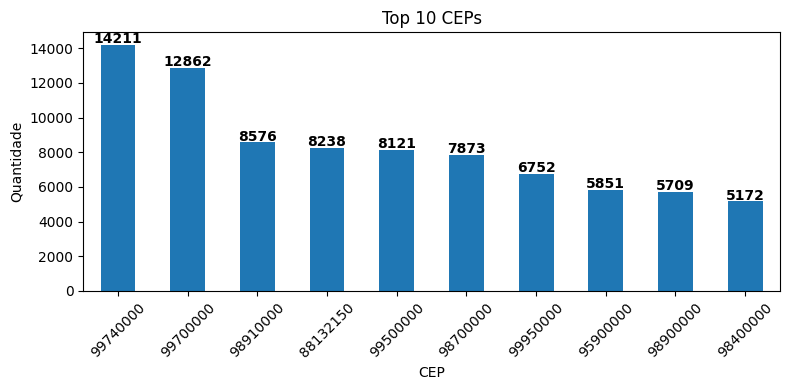

In [18]:
df_itens['CEP'] = pd.to_numeric(df_itens['CEP'], errors='coerce')
df_itens_validos = df_itens[(df_itens['CEP'].notna()) & (df_itens['CEP'] != 0)]
df_itens_validos['CEP'] = df_itens_validos['CEP'].astype(int).astype(str).str.zfill(8)

# Top 10 CEPs
contagem_cep = df_itens_validos['CEP'].value_counts().head(10)

# Gráfico
ax = contagem_cep.plot(kind='bar', figsize=(8, 4), title='Top 10 CEPs')
plt.xlabel('CEP')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

for i, v in enumerate(contagem_cep):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#CEP	Cidade	Estado
#99740000	Barão de Cotegipe	RS
#99700000	Erechim	            RS
#98910000	Três de Maio	    RS
#88132150	Palhoça	            SC
#99500000	Carazinho	        RS
#98700000	Ijuí	            RS
#99950000	Tapejara	        RS
#95900000	Lajeado	            RS
#98900000	Santa Rosa	        RS
#98400000   Frederico Westphalen RS


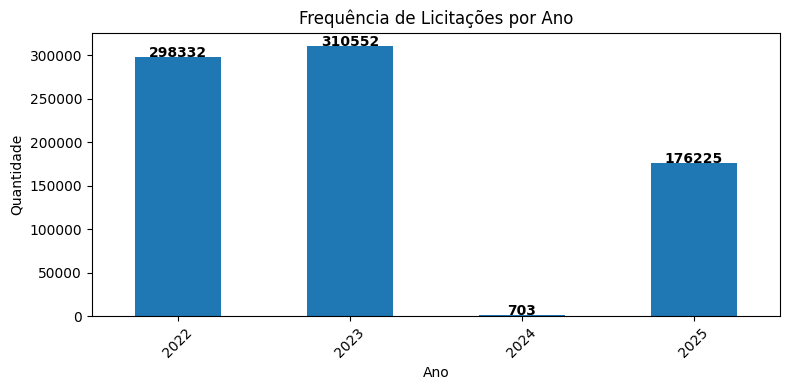

In [19]:
df_itens['ANO_LICITACAO'] = pd.to_numeric(df_itens['ANO_LICITACAO'], errors='coerce')
contagem_ano = df_itens['ANO_LICITACAO'].dropna().astype(int).value_counts().sort_index()

ax = contagem_ano.plot(kind='bar', figsize=(8, 4), title='Frequência de Licitações por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)

for i, v in enumerate(contagem_ano):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


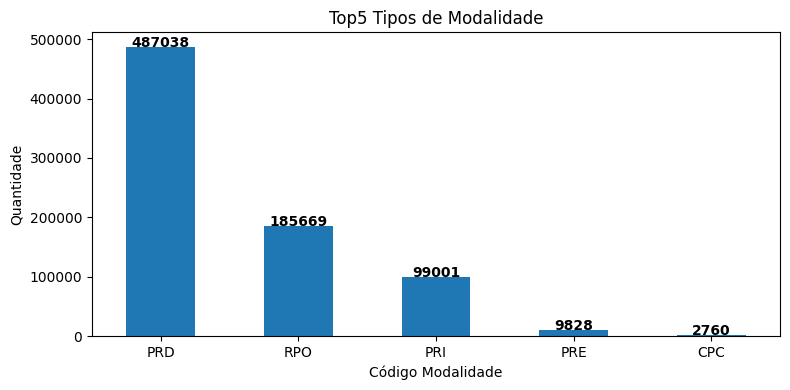

In [20]:
contagem_modalidade = df_itens['CD_TIPO_MODALIDADE'].value_counts().head(5)
ax = contagem_modalidade.plot(kind='bar', figsize=(8, 4), title='Top5 Tipos de Modalidade')
plt.xlabel('Código Modalidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

for i, v in enumerate(contagem_modalidade):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


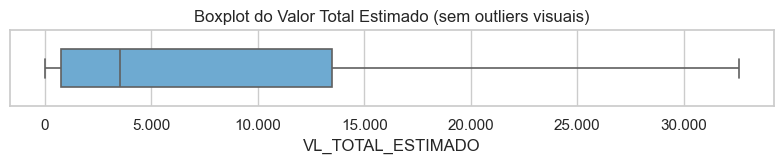

In [21]:
import seaborn as sns
import matplotlib.ticker as mticker

valores = pd.to_numeric(df_itens['VL_TOTAL_ESTIMADO'], errors='coerce').dropna()
valores = valores[valores > 0]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 1.8))

sns.boxplot(
    x=valores,
    color="#5DADE2",
    width=0.5,
    fliersize=0,
    linewidth=1.2,
    showfliers=False
)

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title('Boxplot do Valor Total Estimado (sem outliers visuais)', fontsize=12)
plt.xlabel('VL_TOTAL_ESTIMADO')
plt.yticks([])
plt.tight_layout()
plt.show()


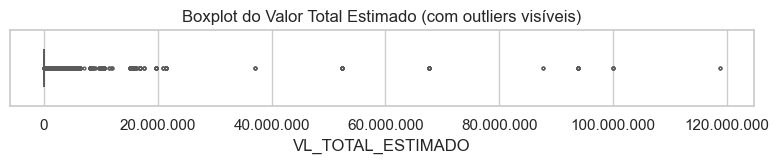

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

valores = pd.to_numeric(df_itens['VL_TOTAL_ESTIMADO'], errors='coerce').dropna()
valores = valores[valores > 0]

# Plot com outliers visíveis
sns.set(style="whitegrid")
plt.figure(figsize=(8, 1.8))

sns.boxplot(
    x=valores,
    color="#58D68D",
    width=0.5,
    linewidth=1.2,
    fliersize=2,  
    showfliers=True
)

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title('Boxplot do Valor Total Estimado (com outliers visíveis)', fontsize=12)
plt.xlabel('VL_TOTAL_ESTIMADO')
plt.yticks([])
plt.tight_layout()
plt.show()

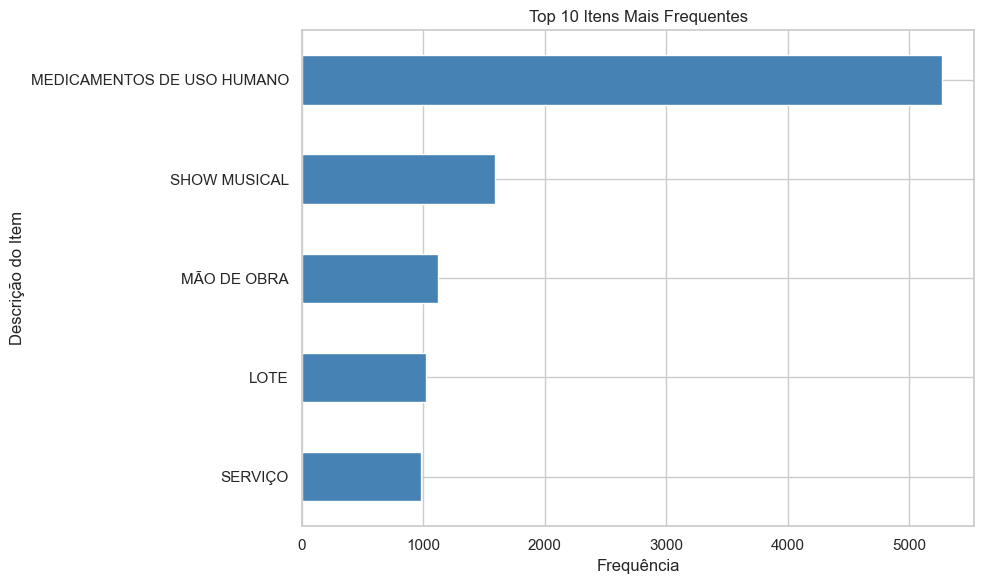

In [ ]:
frequencia_itens = df_itens['DS_ITEM'].value_counts().head(5)
frequencia_itens.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 Itens Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Descrição do Item')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Problema são as outras descrições, muito aleatório.